### The script contains the implementation of the preprocessing operation described here https://www.kaggle.com/competitions/diabetic-retinopathy-detection/discussion/15801

In [ ]:
import cv2 , glob , numpy
import matplotlib.pyplot as plt

In [25]:

def scaleRadius ( img , scale ):
    x=img [ img.shape[0] // 2 , : , : ].sum( 1 )
    r=(x>x.mean() / 10 ).sum( )/ 2
    s=scale*1.0/ r
    return cv2.resize( img , ( 0 , 0 ) , fx=s , fy=s )


In [45]:
scale = 300
for f in glob.glob("C:/Data/Kaggle EyePACS/train/*.jpeg"):
    a=cv2.imread (f)
    
    #scale img to a given radius
    a = scaleRadius( a , scale)
    
    # high pass filter by subtracting Gaussian. I think the value 4 was chosen arbitrarily
    a=cv2.addWeighted ( a, 
                          4, 
                          cv2.GaussianBlur ( a , ( 0 , 0 ) , scale /30), 
                          -4 ,
                          128)

    
    # use circle mask to get 90% of image content
    b=numpy.zeros( a.shape )
    b = cv2.circle(b , ( a.shape[1]//2 , a.shape[0]//2 ) ,
               int( scale*0.9 ) , ( 1 , 1 , 1 ) , -1 , 8 , 0 )
    a=a*b+128*(1-b)
    a = a.astype(int)

    break

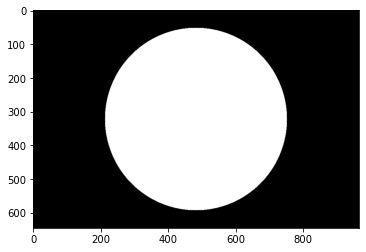

In [38]:
plt.imshow(b)

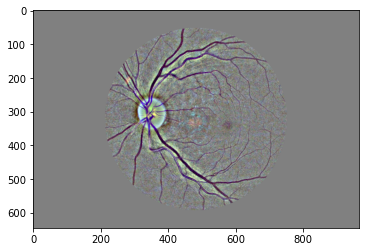

In [46]:
plt.imshow(a)